In [1]:
%matplotlib inline

import numpy as np
np.random.seed(1337)  # for reproducibility

from sklearn import datasets
from sklearn import cross_validation

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [4]:
# split train - test 90% 10%

iris = datasets.load_iris()
X = iris.data  
Y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)


In [6]:
nb_classes = 3

batch_size = 1
nb_epoch = 25

In [7]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
model = Sequential()

model.add(Dense(15, input_shape=(4,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 120 samples, validate on 30 samples
Epoch 1/25
120/120 [==============================] - 0s - loss: 0.9737 - acc: 0.4667 - val_loss: 0.8412 - val_acc: 0.5667
Epoch 2/25
120/120 [==============================] - 0s - loss: 0.6951 - acc: 0.6583 - val_loss: 0.5642 - val_acc: 0.5667
Epoch 3/25
120/120 [==============================] - 0s - loss: 0.4908 - acc: 0.7750 - val_loss: 0.4949 - val_acc: 0.6333
Epoch 4/25
120/120 [==============================] - 0s - loss: 0.4342 - acc: 0.7500 - val_loss: 0.3032 - val_acc: 0.9667
Epoch 5/25
120/120 [==============================] - 0s - loss: 0.4927 - acc: 0.7417 - val_loss: 0.4627 - val_acc: 0.6333
Epoch 6/25
120/120 [==============================] - 0s - loss: 0.4120 - acc: 0.8000 - val_loss: 0.3323 - val_acc: 0.7667
Epoch 7/25
120/120 [==============================] - 0s - loss: 0.4135 - acc: 0.8000 - val_loss: 0.3636 - val_acc: 0.7333
Epoch 8/25
120/120 [==============================] - 0s - loss: 0.3702 - acc: 0.8417 - val_lo

In [9]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=100, n_iter=50000, n_iter_without_progress=1000, random_state=0)
d = model.fit_transform(X_train, Y_train) 

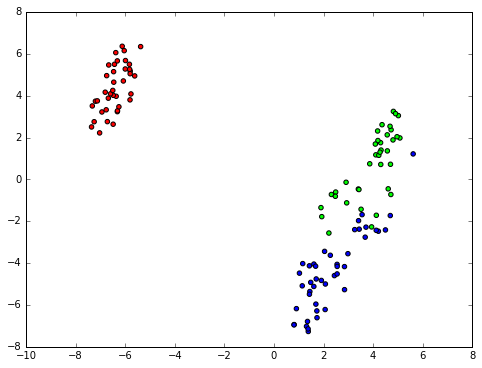

In [10]:
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(d[:, 0], d[:, 1], c=Y_train, cmap=plt.cm.Paired)
plt.show()

In [11]:
from sklearn import tree

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

1.0